In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# for PCA transformation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Remove nrows when ready for full dataset

# Remove 2K from name in last block for complete file

In [3]:
# WARNING, FILE "mergefiles.csv" IS 1.37 GB

delay_data = pd.read_csv("./Resources/Untested_Dataset.csv", encoding = 'utf-8') #, nrows = 200000)
delay = pd.DataFrame(delay_data)

# 1. Data Exploration

In [4]:
# Data type
delay.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                               int64
SNOW                               int64
SNWD                               int64
TMAX            

In [5]:
delay.drop_duplicates()
delay.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0,0,0,65,2.91
1,1,7,0,0700-0759,5,1,29,129,Allegiant Air,13056,...,11,McCarran International,36.08,-115.152,NONE,0,0,0,65,2.91
2,1,7,0,0900-0959,4,2,28,143,Southwest Airlines Co.,13056,...,13,mcCarran International,36.08,-115.152,NONE,0,0,0,65,2.91


In [6]:
# Missing data
delay.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [7]:
# Number of unique values, and range
for col in delay.columns:
    print(f'"{col}" has {delay[col].nunique()} unique values, from {delay[col].min()} to {delay[col].max()}')

"MONTH" has 1 unique values, from 1 to 1
"DAY_OF_WEEK" has 1 unique values, from 7 to 7
"DEP_DEL15" has 1 unique values, from 0 to 0
"DEP_TIME_BLK" has 3 unique values, from 0700-0759 to 0900-0959
"DISTANCE_GROUP" has 3 unique values, from 2 to 5
"SEGMENT_NUMBER" has 2 unique values, from 1 to 2
"CONCURRENT_FLIGHTS" has 3 unique values, from 25 to 29
"NUMBER_OF_SEATS" has 2 unique values, from 129 to 143
"CARRIER_NAME" has 2 unique values, from Allegiant Air to Southwest Airlines Co.
"AIRPORT_FLIGHTS_MONTH" has 1 unique values, from 13056 to 13056
"AIRLINE_FLIGHTS_MONTH" has 2 unique values, from 6713 to 107363
"AIRLINE_AIRPORT_FLIGHTS_MONTH" has 2 unique values, from 645 to 5873
"AVG_MONTHLY_PASS_AIRPORT" has 1 unique values, from 1903352 to 1903352
"AVG_MONTHLY_PASS_AIRLINE" has 2 unique values, from 1257616 to 13382999
"FLT_ATTENDANTS_PER_PASS" has 2 unique values, from 1.3e-05 to 6.2e-05
"GROUND_SERV_PER_PASS" has 2 unique values, from 9.9e-05 to 0.000108
"PLANE_AGE" has 3 unique v

In [8]:
# Number of flights not delayed (0), and delayed (1)
delay['DEP_DEL15'].value_counts()

0    3
Name: DEP_DEL15, dtype: int64

In [9]:
# Number of airports
delay['DEPARTING_AIRPORT'].nunique()

2

In [10]:
# Number of flights per airport
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()

DEPARTING_AIRPORT
McCarran International    2
mcCarran International    1
Name: DEP_DEL15, dtype: int64

In [11]:
# Replace " " with "_"
#delay = delay.replace(" ", "_", regex = True)
delay['PREVIOUS_AIRPORT'] = delay['PREVIOUS_AIRPORT'].str.replace(" ", "_")
delay['PREVIOUS_AIRPORT'] = delay['PREVIOUS_AIRPORT'].str.replace("/", "_")
delay['DEP_TIME_BLK'] = delay['DEP_TIME_BLK'].str.replace("-", "_")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace(" ", "_")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace("/", "_")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace(".", "")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace("'Hare", "Hare")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace("-", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace(" ", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace("/", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace(".", "")
delay.head(5)

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800_0859,2,1,25,143,Southwest_Airlines_Co,13056,...,8,McCarran_International,36.08,-115.152,NONE,0,0,0,65,2.91
1,1,7,0,0700_0759,5,1,29,129,Allegiant_Air,13056,...,11,McCarran_International,36.08,-115.152,NONE,0,0,0,65,2.91
2,1,7,0,0900_0959,4,2,28,143,Southwest_Airlines_Co,13056,...,13,mcCarran_International,36.08,-115.152,NONE,0,0,0,65,2.91


In [12]:
# Airport with least number of flights
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().min()

1

In [13]:
# Grouped by airport: count of delay/on-time
print(delay.groupby(['DEPARTING_AIRPORT','DEP_DEL15'])['MONTH'].agg('count'))

DEPARTING_AIRPORT       DEP_DEL15
McCarran_International  0            2
mcCarran_International  0            1
Name: MONTH, dtype: int64


### Distance group
1 to 11
Distance group to be flown by departing aircraft.

<AxesSubplot:>

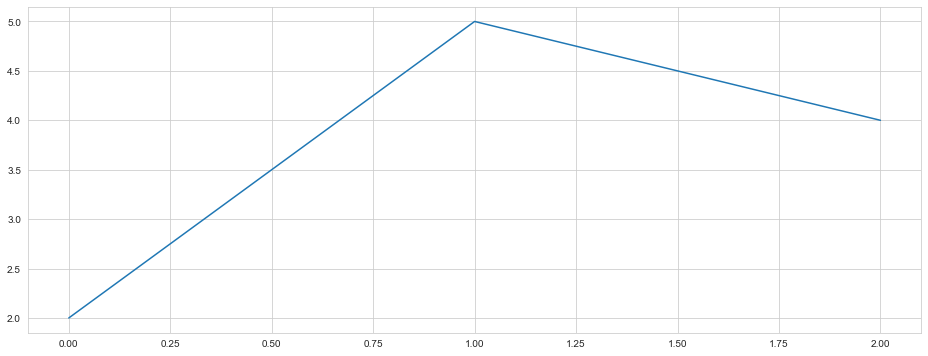

In [14]:
sns.set_style('whitegrid')
delay["DISTANCE_GROUP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

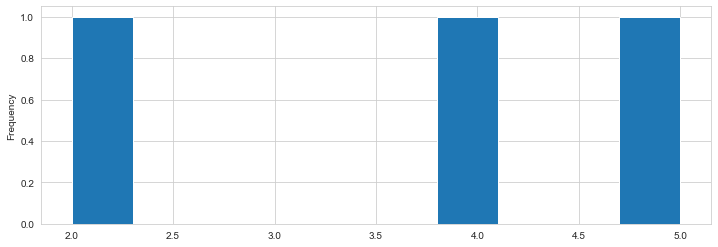

In [15]:
delay['DISTANCE_GROUP'].plot(kind='hist', figsize = (12, 4))

### Segment number
1 to 15
The segment that this tail number is on for the day.

<AxesSubplot:>

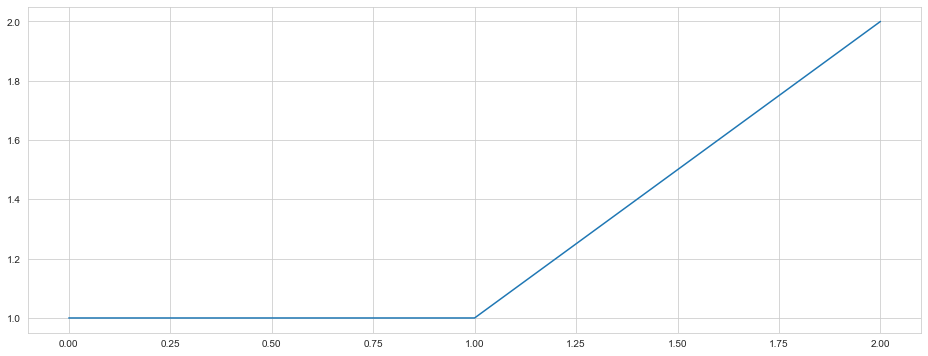

In [16]:
delay["SEGMENT_NUMBER"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

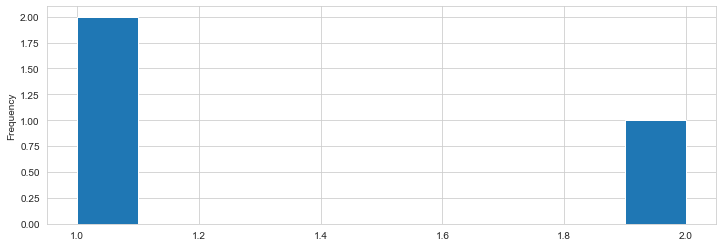

In [17]:
delay['SEGMENT_NUMBER'].plot(kind = 'hist', figsize = (12, 4))

### Concurrent flights

<AxesSubplot:>

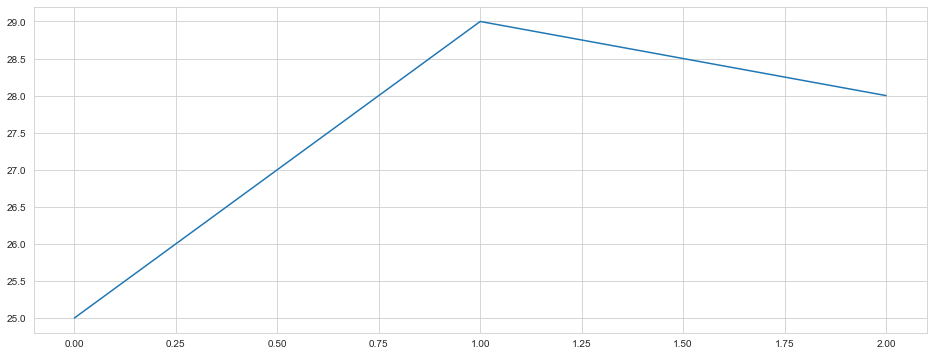

In [18]:
delay["CONCURRENT_FLIGHTS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

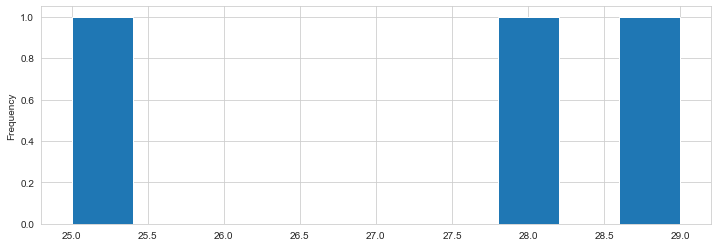

In [19]:
delay['CONCURRENT_FLIGHTS'].plot(kind = 'hist', figsize = (12, 4))

### Number of seats

<AxesSubplot:>

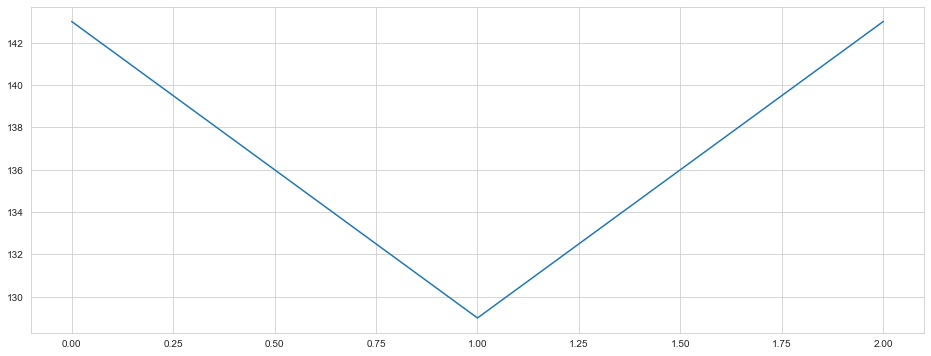

In [20]:
delay["NUMBER_OF_SEATS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

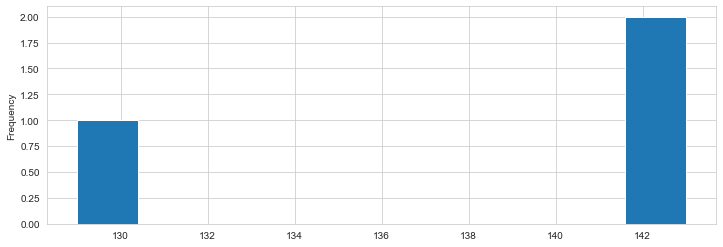

In [21]:
delay['NUMBER_OF_SEATS'].plot(kind = 'hist', figsize = (12, 4))

### Airport flights per month

<AxesSubplot:>

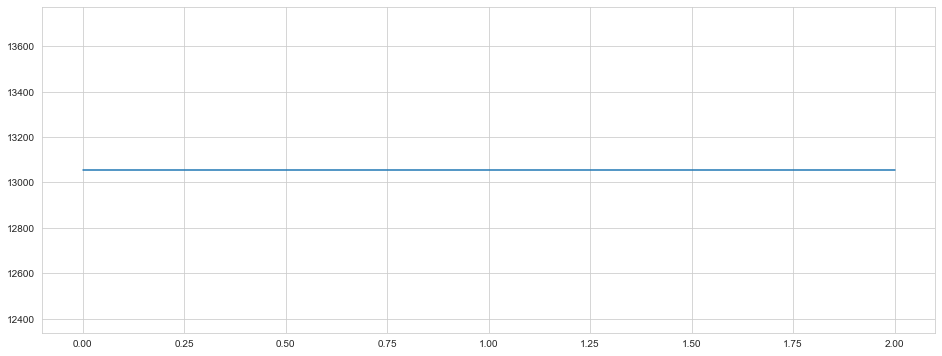

In [22]:
delay["AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

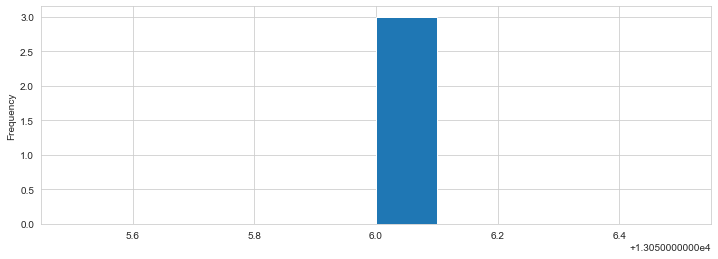

In [23]:
delay['AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### Airline flights per month

<AxesSubplot:>

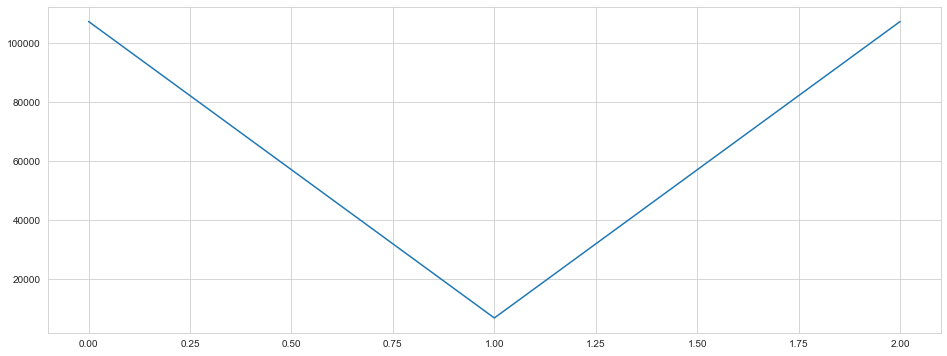

In [24]:
delay["AIRLINE_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

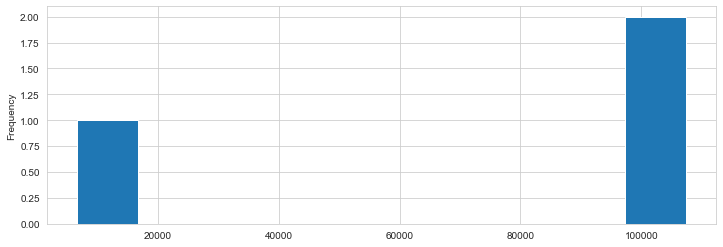

In [25]:
delay['AIRLINE_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AIRLINE_AIRPORT_FLIGHTS_MONTH

<AxesSubplot:>

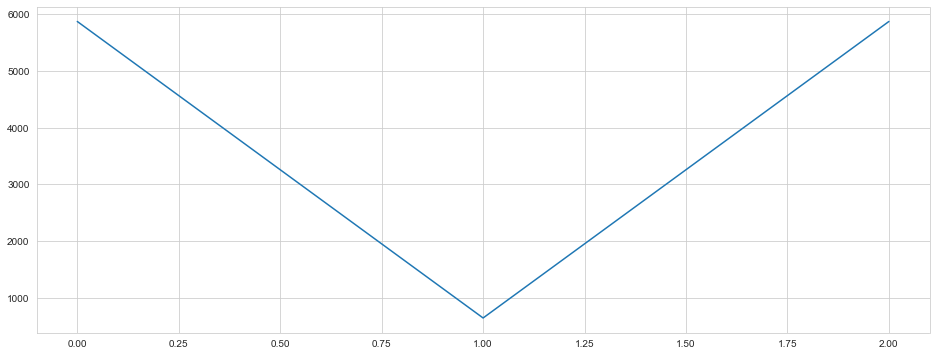

In [26]:
delay["AIRLINE_AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

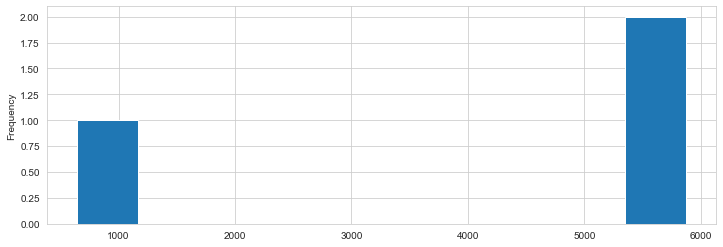

In [27]:
delay['AIRLINE_AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRPORT

<AxesSubplot:>

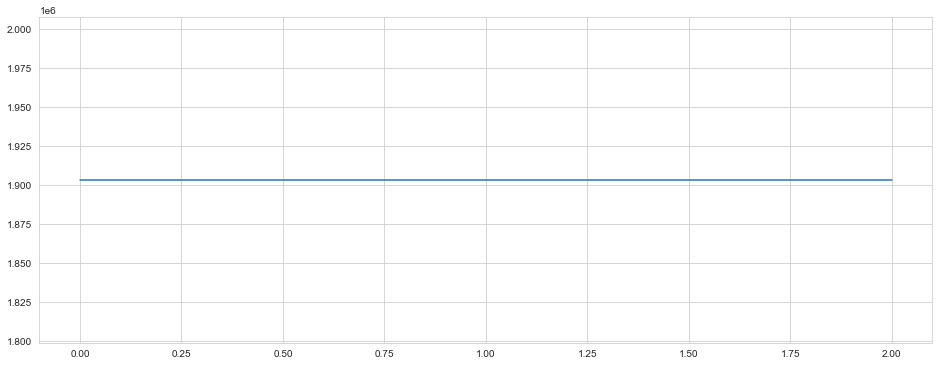

In [28]:
delay["AVG_MONTHLY_PASS_AIRPORT"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

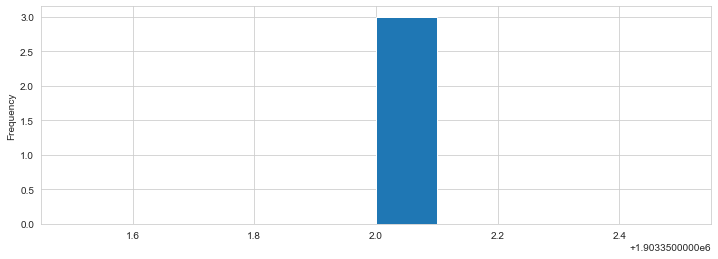

In [29]:
delay['AVG_MONTHLY_PASS_AIRPORT'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRLINE

<AxesSubplot:>

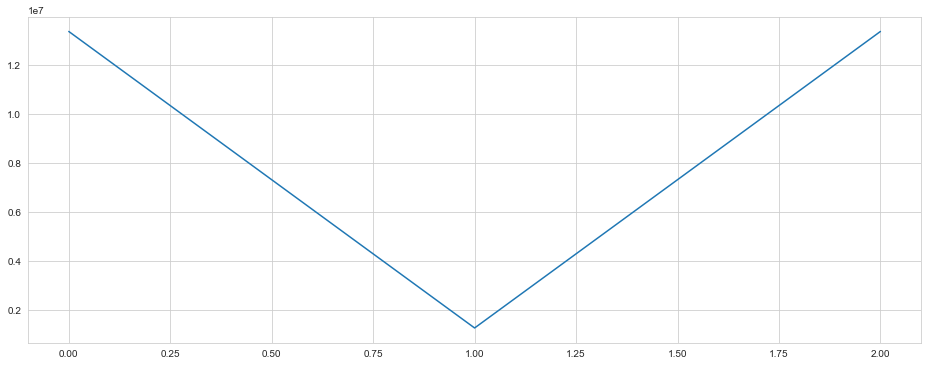

In [30]:
delay["AVG_MONTHLY_PASS_AIRLINE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

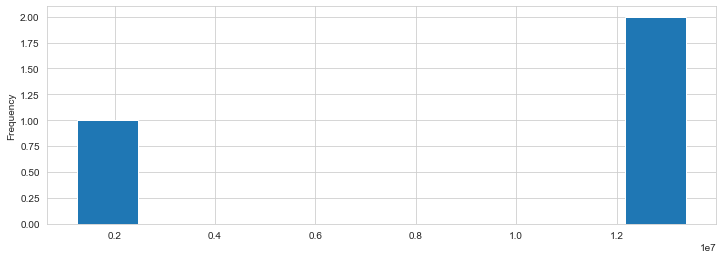

In [31]:
delay['AVG_MONTHLY_PASS_AIRLINE'].plot(kind = 'hist', figsize = (12, 4))

### FLT_ATTENDANTS_PER_PASS

<AxesSubplot:>

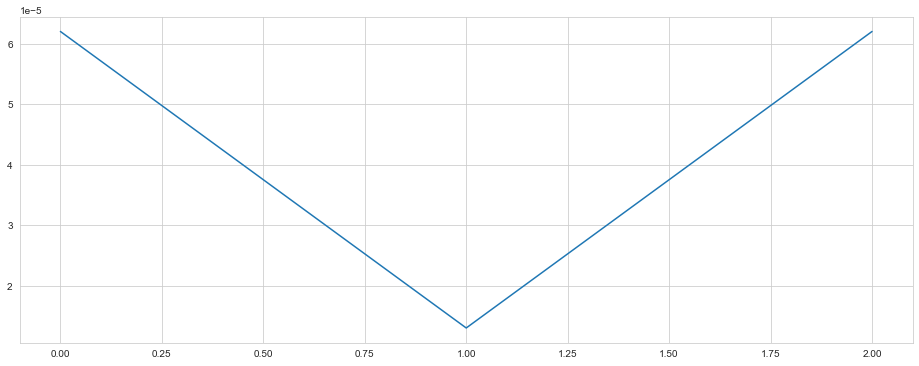

In [32]:
delay["FLT_ATTENDANTS_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

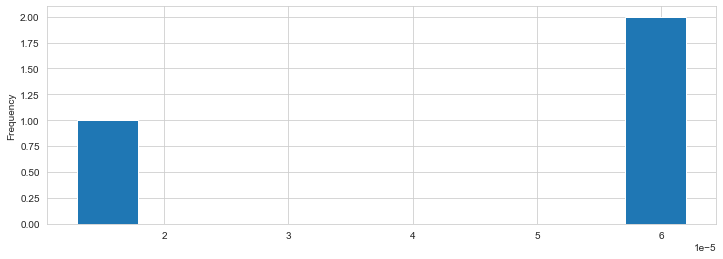

In [33]:
delay['FLT_ATTENDANTS_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### GROUND_SERV_PER_PASS

<AxesSubplot:>

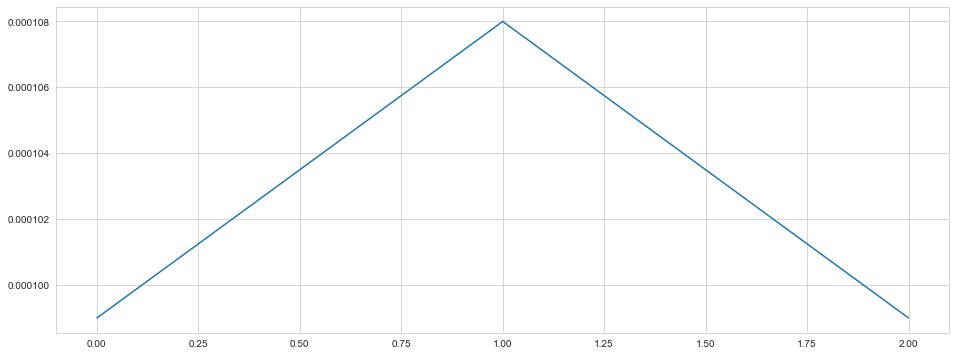

In [34]:
delay["GROUND_SERV_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

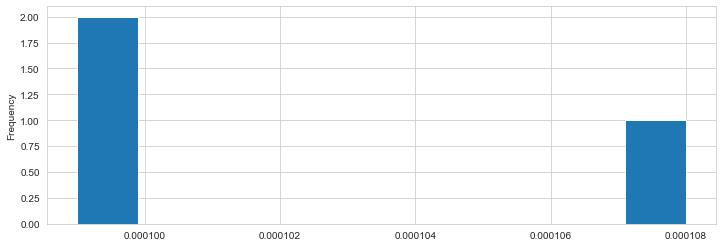

In [35]:
delay['GROUND_SERV_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### Plane age

<AxesSubplot:>

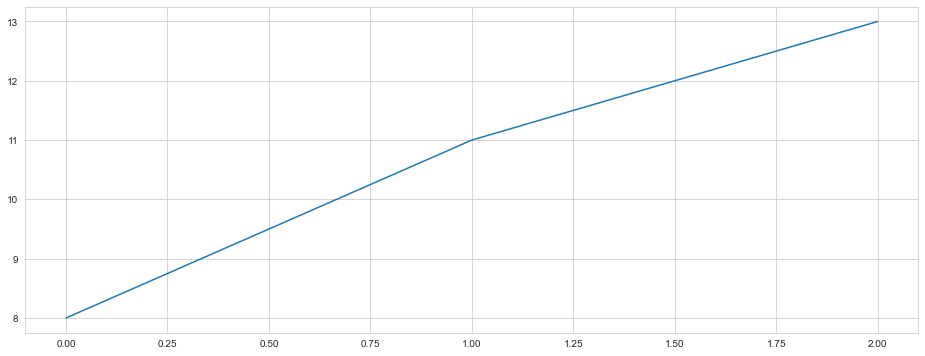

In [36]:
delay["PLANE_AGE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

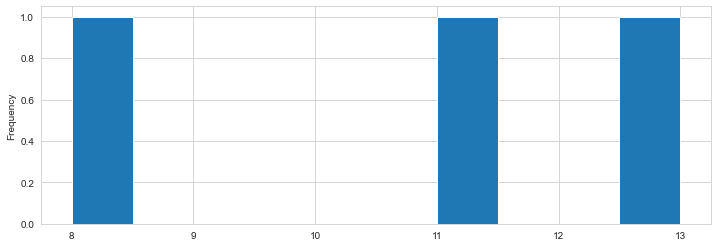

In [37]:
delay['PLANE_AGE'].plot(kind = 'hist', figsize = (12, 4))

### Departing airport

<AxesSubplot:xlabel='DEPARTING_AIRPORT'>

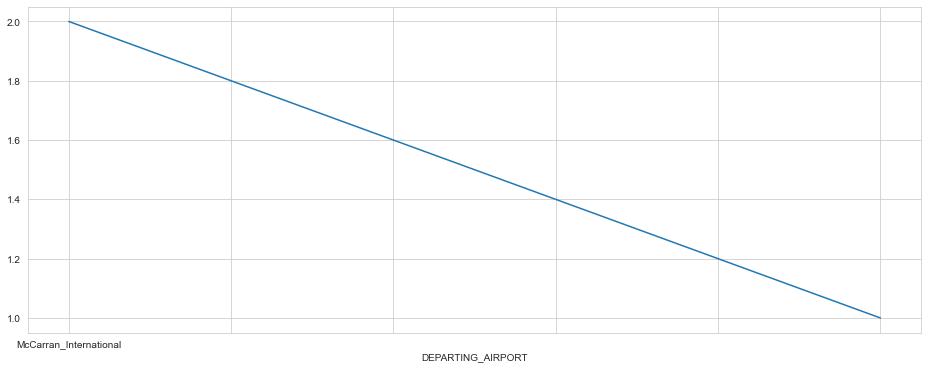

In [38]:
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().plot(figsize = (16, 6))

### Previous airport

<AxesSubplot:xlabel='PREVIOUS_AIRPORT'>

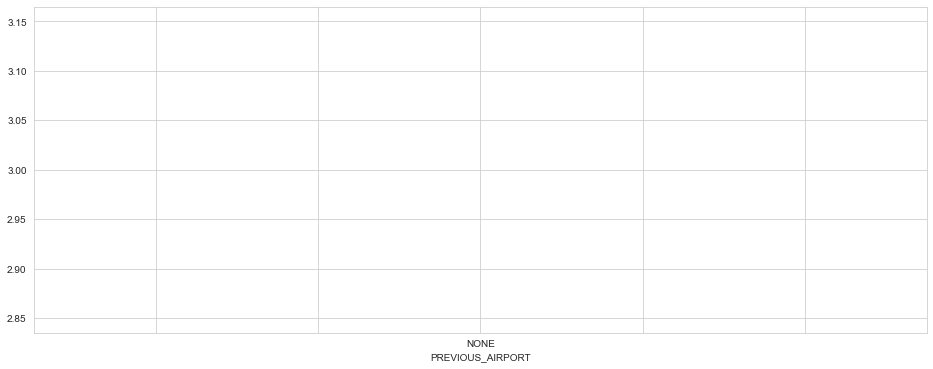

In [39]:
delay.groupby('PREVIOUS_AIRPORT')['DEP_DEL15'].count().plot(figsize = (16, 6))

### Precipitation

<AxesSubplot:>

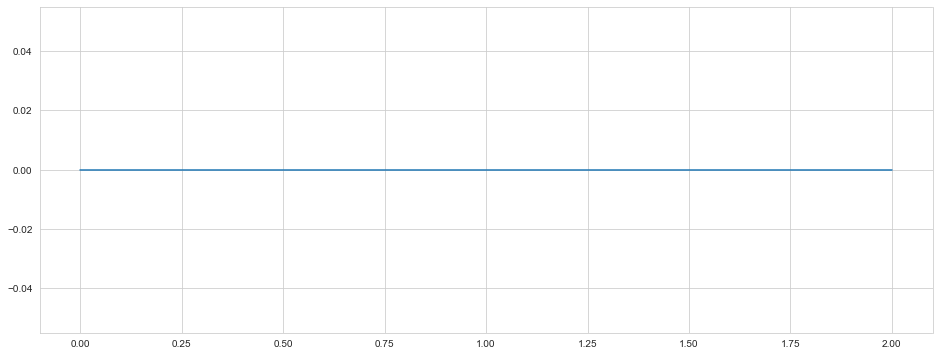

In [40]:
delay["PRCP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

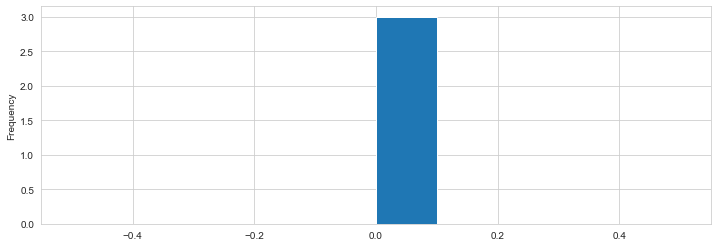

In [41]:
delay['PRCP'].plot(kind = 'hist', figsize = (12, 4))

### Snow (SNOW)
0 to 17.2
Inches of snowfall for day.

<AxesSubplot:>

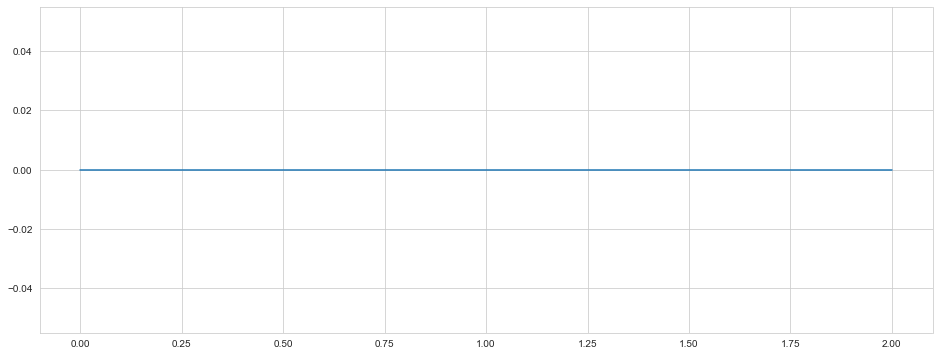

In [42]:
delay["SNOW"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

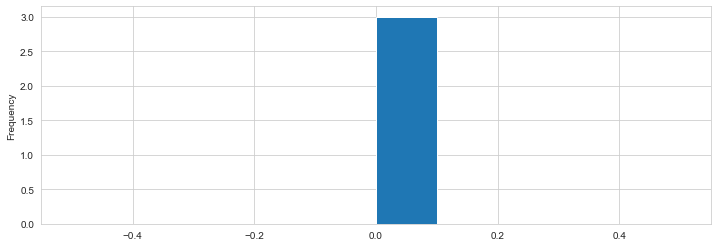

In [43]:
delay['SNOW'].plot(kind = 'hist', figsize = (12, 4))

### SNOWD
0 to 25.2
Inches of snow on ground for day.

<AxesSubplot:>

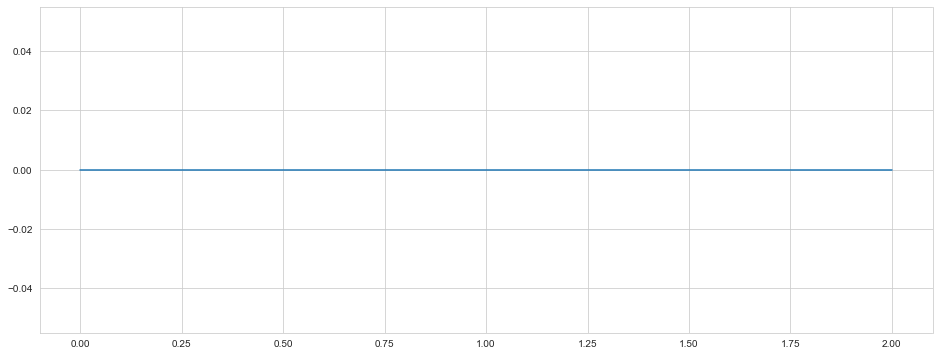

In [44]:
delay["SNWD"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

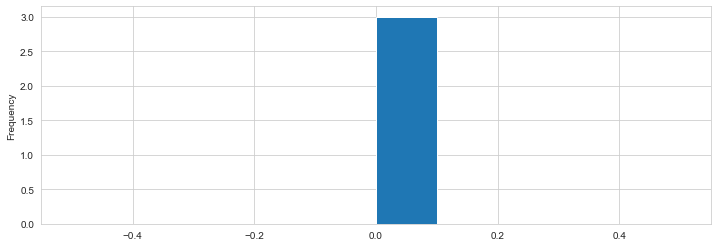

In [45]:
delay['SNWD'].plot(kind='hist', figsize = (12, 4))

### Temperature

<AxesSubplot:>

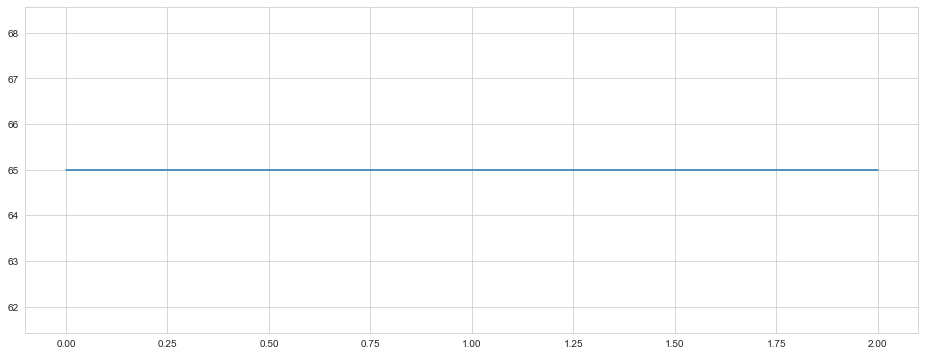

In [46]:
delay["TMAX"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

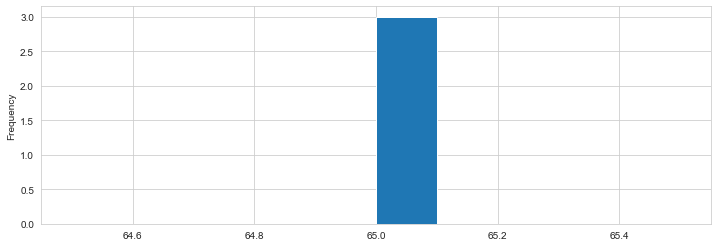

In [47]:
delay['TMAX'].plot(kind = 'hist', figsize = (12, 4))

### Air wind speed (AWND)
0 to 33.78
Max wind speed for day.

<AxesSubplot:>

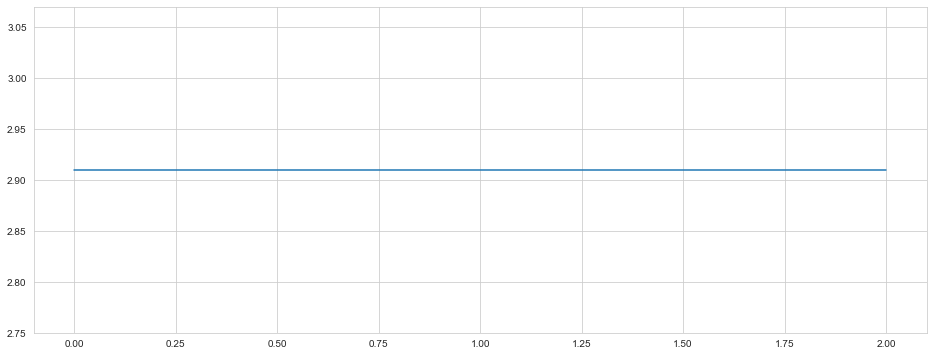

In [48]:
delay["AWND"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

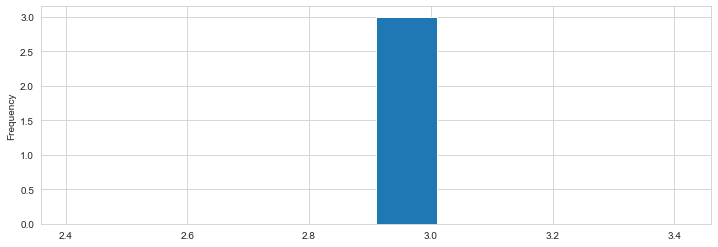

In [49]:
delay['AWND'].plot(kind = 'hist', figsize = (12, 4))

# 2. Data Cleanup

### DEP_TIME_BLK categorical variable

In [50]:
# Visualize the value counts
DEP_TIME_BLK_counts = delay.DEP_TIME_BLK.value_counts()
DEP_TIME_BLK_counts

0800_0859    1
0700_0759    1
0900_0959    1
Name: DEP_TIME_BLK, dtype: int64

LinAlgError: singular matrix

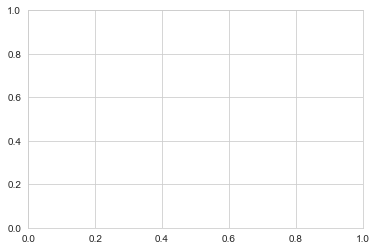

In [51]:
DEP_TIME_BLK_counts.plot.density()

In [52]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse = False)

In [53]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(delay.DEP_TIME_BLK.values.reshape(-1,1)))

In [54]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['DEP_TIME_BLK'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,DEP_TIME_BLK_0700_0759,DEP_TIME_BLK_0800_0859,DEP_TIME_BLK_0900_0959
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


In [55]:
# Merge the two DataFrames together and drop the encoded column
delay_block = delay.merge(encode_df,left_index = True, right_index = True).drop(["DEP_TIME_BLK"], axis = 1)

In [56]:
delay_block.sample(5)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [57]:
# Fit the encoder and produce encoded DataFrame (CARRIER_NAME)
encode_df = pd.DataFrame(enc.fit_transform(delay_block.CARRIER_NAME.values.reshape(-1,1)))

In [58]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['CARRIER_NAME'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CARRIER_NAME_Allegiant_Air,CARRIER_NAME_Southwest_Airlines_Co
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0


In [59]:
# Merge the two DataFrames together and drop the encoded column
delay_carrier = delay_block.merge(encode_df,left_index = True, right_index = True).drop(["CARRIER_NAME"], axis = 1)

In [60]:
delay_carrier.sample(5)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [61]:
# Convert DEPARTING_AIRPORT categorical variable
encode_df = pd.DataFrame(enc.fit_transform(delay_carrier.DEPARTING_AIRPORT.values.reshape(-1,1)))

In [62]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['DEPARTING_AIRPORT'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,DEPARTING_AIRPORT_McCarran_International,DEPARTING_AIRPORT_mcCarran_International
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0


In [63]:
# Merge the two DataFrames together and drop the encoded column
delay_departing = delay_carrier.merge(encode_df,left_index = True, right_index = True).drop(["DEPARTING_AIRPORT"], axis = 1)

In [64]:
delay_departing.sample(5)

ValueError: Cannot take a larger sample than population when 'replace=False'

### Replace with 1 if a previous airport exists (connection flight)

In [65]:
delay_departing["PREVIOUS_AIRPORT"] = np.where(delay_departing["PREVIOUS_AIRPORT"] == "NONE", 0, 1)

### Apply PCA to airport coordinates, reduce from two to one feature

In [66]:
coord_pca = delay_departing[['LATITUDE', 'LONGITUDE']]
coord_pca.head()

,LATITUDE,LONGITUDE
0,36.08,-115.152
1,36.08,-115.152
2,36.08,-115.152


In [67]:
# Initialize PCA model
pca = PCA(n_components = 1)

In [68]:
# Get principal component for the dataset
transfor_coord = pca.fit_transform(coord_pca)
transfor_coord

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


array([[0.],
       [0.],
       [0.]])

In [70]:
# Transform PCA data to a DataFrame
new_coord = pd.DataFrame(data = transfor_coord, columns = ["principal_component"])
new_coord

,principal_component
0,0.0
1,0.0
2,0.0


In [71]:
# Explained variance
pca.explained_variance_ratio_

array([nan])

### Remove LATITUDE and LONGITUD
### Merge dataframe with one PCA feature

In [72]:
delay_departing.drop(['LATITUDE', 'LONGITUDE'], axis = 1, inplace = True)

In [73]:
delay_withPCA = pd.concat([delay_departing, new_coord], axis = 1)
delay_withPCA

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,TMAX,AWND,DEP_TIME_BLK_0700_0759,DEP_TIME_BLK_0800_0859,DEP_TIME_BLK_0900_0959,CARRIER_NAME_Allegiant_Air,CARRIER_NAME_Southwest_Airlines_Co,DEPARTING_AIRPORT_McCarran_International,DEPARTING_AIRPORT_mcCarran_International,principal_component
0,1,7,0,2,1,25,143,13056,107363,5873,...,65,2.91,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,7,0,5,1,29,129,13056,6713,645,...,65,2.91,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,7,0,4,2,28,143,13056,107363,5873,...,65,2.91,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [74]:
mycol = delay_withPCA.columns
mylist =[]
for i in mycol:
    mylist.append(i)
mylist

['MONTH',
 'DAY_OF_WEEK',
 'DEP_DEL15',
 'DISTANCE_GROUP',
 'SEGMENT_NUMBER',
 'CONCURRENT_FLIGHTS',
 'NUMBER_OF_SEATS',
 'AIRPORT_FLIGHTS_MONTH',
 'AIRLINE_FLIGHTS_MONTH',
 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
 'AVG_MONTHLY_PASS_AIRPORT',
 'AVG_MONTHLY_PASS_AIRLINE',
 'FLT_ATTENDANTS_PER_PASS',
 'GROUND_SERV_PER_PASS',
 'PLANE_AGE',
 'PREVIOUS_AIRPORT',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'AWND',
 'DEP_TIME_BLK_0700_0759',
 'DEP_TIME_BLK_0800_0859',
 'DEP_TIME_BLK_0900_0959',
 'CARRIER_NAME_Allegiant_Air',
 'CARRIER_NAME_Southwest_Airlines_Co',
 'DEPARTING_AIRPORT_McCarran_International',
 'DEPARTING_AIRPORT_mcCarran_International',
 'principal_component']

# COPY FROM ABOVE and MANUALLY move DEP_DEL15 to the first place

In [75]:
mynewlist = ['DEP_DEL15',
 'MONTH',
 'DAY_OF_WEEK',
 'DISTANCE_GROUP',
 'SEGMENT_NUMBER',
 'CONCURRENT_FLIGHTS',
 'NUMBER_OF_SEATS',
 'AIRPORT_FLIGHTS_MONTH',
 'AIRLINE_FLIGHTS_MONTH',
 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
 'AVG_MONTHLY_PASS_AIRPORT',
 'AVG_MONTHLY_PASS_AIRLINE',
 'FLT_ATTENDANTS_PER_PASS',
 'GROUND_SERV_PER_PASS',
 'PLANE_AGE',
 'PREVIOUS_AIRPORT',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'AWND',
 'DEP_TIME_BLK_0700_0759',
 'DEP_TIME_BLK_0800_0859',
 'DEP_TIME_BLK_0900_0959',
 'CARRIER_NAME_Allegiant_Air',
 'CARRIER_NAME_Southwest_Airlines_Co',
 'DEPARTING_AIRPORT_McCarran_International',
 'DEPARTING_AIRPORT_mcCarran_International',
 'principal_component']

In [76]:
delay_new = delay_withPCA.reindex(columns = mynewlist)
delay_new

,DEP_DEL15,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,TMAX,AWND,DEP_TIME_BLK_0700_0759,DEP_TIME_BLK_0800_0859,DEP_TIME_BLK_0900_0959,CARRIER_NAME_Allegiant_Air,CARRIER_NAME_Southwest_Airlines_Co,DEPARTING_AIRPORT_McCarran_International,DEPARTING_AIRPORT_mcCarran_International,principal_component
0,0,1,7,2,1,25,143,13056,107363,5873,...,65,2.91,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,1,7,5,1,29,129,13056,6713,645,...,65,2.91,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,1,7,4,2,28,143,13056,107363,5873,...,65,2.91,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Save cleaned data as a new csv file

In [77]:
#      ADD NEWNAME to GITIGNORE!!!!!
delay_new.to_csv("./Resources/delay_cleanCOPY.csv", index = False)